In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import alpro 
alpro.util.set_default_plot_params(tex=True)

### Cluster Survival Curves
This notebook contains a few example plots from cluster models of the magnetic fields with ALP probabilities calculated from their profiles.

In [2]:
# load data from Marsh and Libanov codes 
import os
folder = os.path.dirname(alpro.__file__)
fname = "mass13_g12.3/PE_mean_ma_13_g_12.3_mod.dat".format(folder)
E1, E2, Pmarsh, Ps = np.genfromtxt(fname, unpack=True)
energies_marsh = 0.5 * (E2 + E1) * 1e3

In [3]:
# initialise cluster models 
s1 = alpro.Survival("1275b")
s1.init_model()

energies = np.linspace(3,4,1000)


# set axion parameters
g = (10.0**(-12.3)) * 1e-9   # 1e-11 GeV^-1
mass = 1e-13       # 1e-12 eV
s1.set_params(g, mass)

# virial radius of 1.8 Mpc
Lmax = 1800.0 

# compute curves for different model instances
N = 100
Ptot = np.zeros( (2,N,len(energies)) )
for seed in np.arange(N):
#     print (seed)
    Ptot[0,seed,:] = 1.0 - s1.get_curve(energies, seed, Lmax)
    Ptot[1,seed,:] = 1.0 - s1.get_curve(energies, 100+seed, Lmax)

[]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


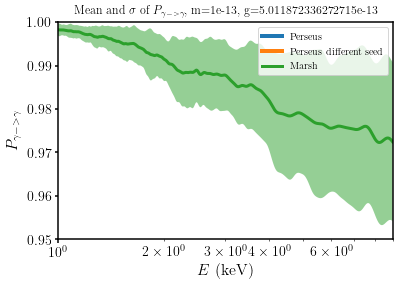

In [4]:
# make plots 
energies_marsh = 0.5 * (E2 + E1) * 1e3 
labels = ["Perseus", "Perseus different seed"]
for i in range(2):
    P = Ptot[i,:,:]
    mean_P = np.mean(P, axis=0)
    plt.plot(energies/1e3, mean_P, label=labels[i], lw=4)
    sigma = np.std(P, axis=0)
    plt.fill_between(energies/1e3, mean_P-sigma, mean_P+sigma, alpha=0.5)

#plt.plot(energies/1e3, Ptot[1,10,:], lw=2, c="k", ls=":", label="1821, Realisation 1")
#plt.plot(energies/1e3, Ptot[1,20,:], lw=2, c="k", ls="--", label="1821, Realisation 2")
plt.plot(energies_marsh/1e3, Pmarsh, label="Marsh")
plt.fill_between(energies_marsh/1e3, Pmarsh-Ps, Pmarsh+Ps, alpha=0.5)

plt.xlabel("$E$ (keV)", fontsize=16)
plt.ylabel("$P_{\gamma->\gamma}$", fontsize=16)
plt.legend()
plt.title(r"Mean and $\sigma$ of $P_{{\gamma->\gamma}}$, m={}, g={}".format(mass, g/1e-9))
plt.xlim(1,9)
plt.ylim(0.95,1.0)
plt.semilogx()